# ch5: memory architecture and data locality

## 5.1 Importance of memory access efficiency

**compute to global memory access ratio**, defined as the number of FLOPs performed for
each byte access from the global memory within a region of a program. 
Thisratio is sometimes also referred to as **arithmetic intensity** or **computational intensity** in the literature.

- The Roofline Model

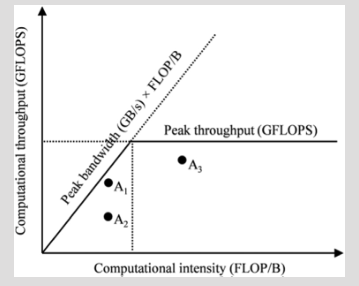

## 5.2 CUDA memory types

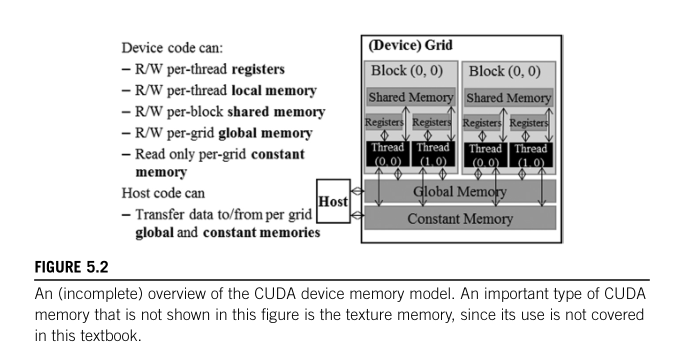

#### on chip memory
- register
- shared memory

#### off chip memory
- global memory
- const memory
 Both these types of memory can be written (W) and read (R) by the host. The global memory can also be written and read by the device, whereas the constant memory supports short-latency, high-bandwidth read-only access by the device
- local memory
 which can also be read and written. The local memory is actually placed in global memory and has similar access latency, but it is not shared across threads. Each thread has its own section of global memory that it uses as its own private local memory where it places
data that is private to the thread but cannot be allocated in registers. This data includes statically allocated arrays, spilled registers, and other elements of the thread’s call stack.

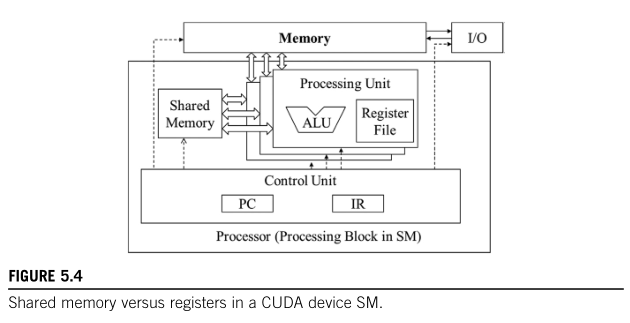

### CUDA variable declaration type

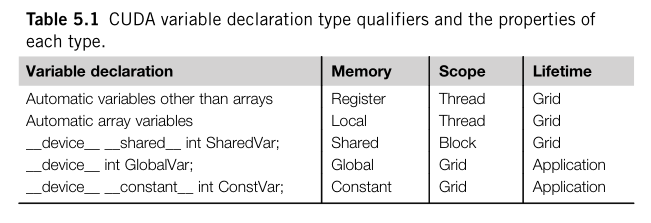

- If a variable’s lifetime is within a grid’s execution, it must be declared within the kernel function body and will be available for use only by the kernel’s code. 
 If the kernel is invoked several times, the value of the variable is not maintained across these invocations. Each invocation must initialize the variable in order to use it. 
- On the other hand, if a variable’s lifetime is throughout the entire application, it must be declared outside of any function body. The contents of these variables are maintained throughout the execution of the application and available to all kernels
- Automatic array variables are not stored in registers. Instead, they are stored into the thread’s local memory and may incur long access delays and potential access congestions

##  5.3 a tiled matrix multiplication kernel that uses shared memory to reduce traffic to the global memory

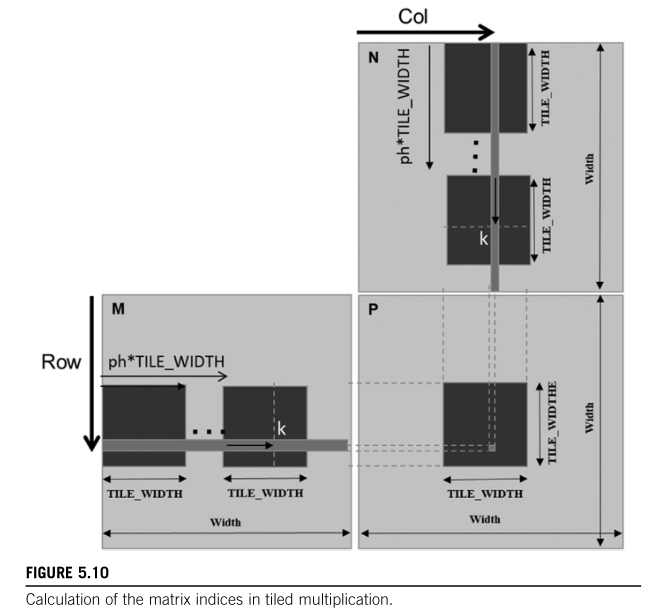

a few simplifying assumptions. 
- First, the width of the matrices is assumed to be a multiple of the width of thread blocks. 
- second, the matrices are square matrices

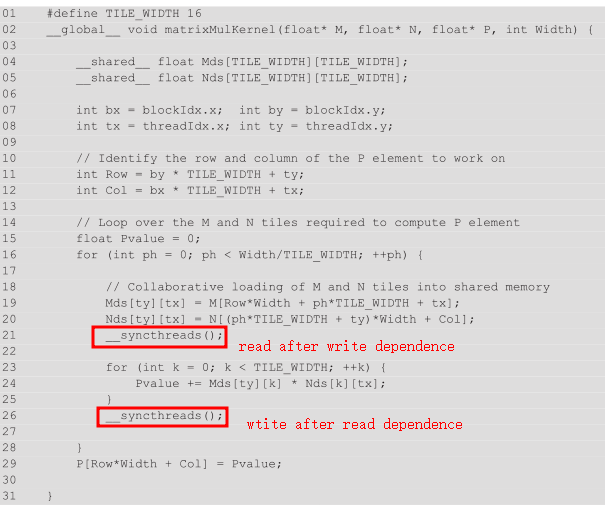

- A100 GPU global memory bandwidth of **1555 GB/second**
- the A100 GPU can be configured to have up to **164 KB of shared memory per SM and supports a maximum of 2048 threads per SM**
- Thus for all 2048 thread slots to be used, a thread block should not use more than an average of (164 KB)/(2048 threads)=82 B/thread. 
In the tiled matrix multiplication example, every block has TILE_WIDTH2 threads, and uses TILE_WIDTH2 * 4B of shared memory for Mds and
TILE_WIDTH 2 ? 4B of shared memory for Nds . Thus the thread block uses an average of ( TILE_WIDTH 2 ? 4B + TILE_WIDTH 2 ? 4B)/( TILE_WIDTH 2 threads)=8 B/thread of shared memory. Therefore the tiled matrix multiplication kernel’s occupancy is not limited by the shared memory

-  One key difference is that tiling techniques on CPUs rely on the CPU cache to keep reused data on-chip implicitly, whereas tiling techniques on GPUs use shared memory explicitly to keep the data on-chip

### Boundary checks

Tiled matrix multiplication kernel with boundary condition checks.

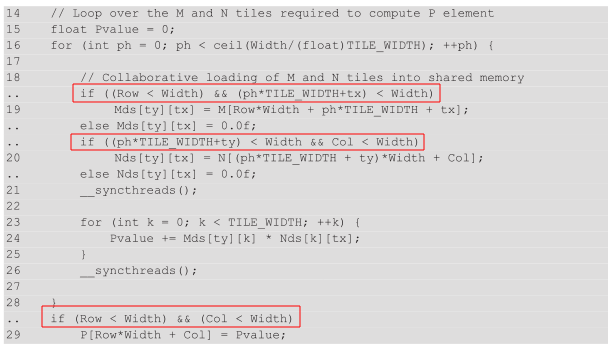

In [ ]:
cudaDeviceProp devProp;
cudaGetDeviceProperties(&devProp)
## gives the amount of shared memory that is available in each SM
devProp.sharedMemPerBlock

In [ ]:
## dynamic shared memory
extern __shared__ char Mds_Nds[];